In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
from msresist.clustering import PSPSLdict
from msresist.figures.figure3 import plotMotifs
from msresist.pre_processing import MeanCenter

In [2]:
def predict_UpstreamKinases(pssms):
        """Compute matrix-matrix similarity between kinase specificity profiles and cluster PSSMs to identify upstream kinases regulating clusters."""
        PSPLs = PSPSLdict()
        PSSMs = [np.delete(np.array(list(np.array(mat))), [5, 10], 1) for mat in pssms]  # Remove P0 and P+5 from pssms
        a = np.zeros((len(PSPLs), len(PSSMs)))

        for ii, spec_profile in enumerate(PSPLs.values()):
            if np.all(spec_profile >= 0):
                spec_profile = np.log2(spec_profile)
            for jj, pssm in enumerate(PSSMs):
                a[ii, jj] = np.linalg.norm(pssm - spec_profile)

        table = pd.DataFrame(a)
        table.insert(0, "Kinase", list(PSPSLdict().keys()))
        return table

In [3]:
with open('msresist/data/pickled_models/AXLmodel_PAM250_W2_5CL', 'rb') as p:
    model = pickle.load(p)[0]

upK = predict_UpstreamKinases(model.pssms(PsP_background=True))

In [4]:
# from msresist.pre_processing import MeanCenter
# upK = MeanCenter(upK, mc_col=False, mc_row=True)

<AxesSubplot:ylabel='Kinase'>

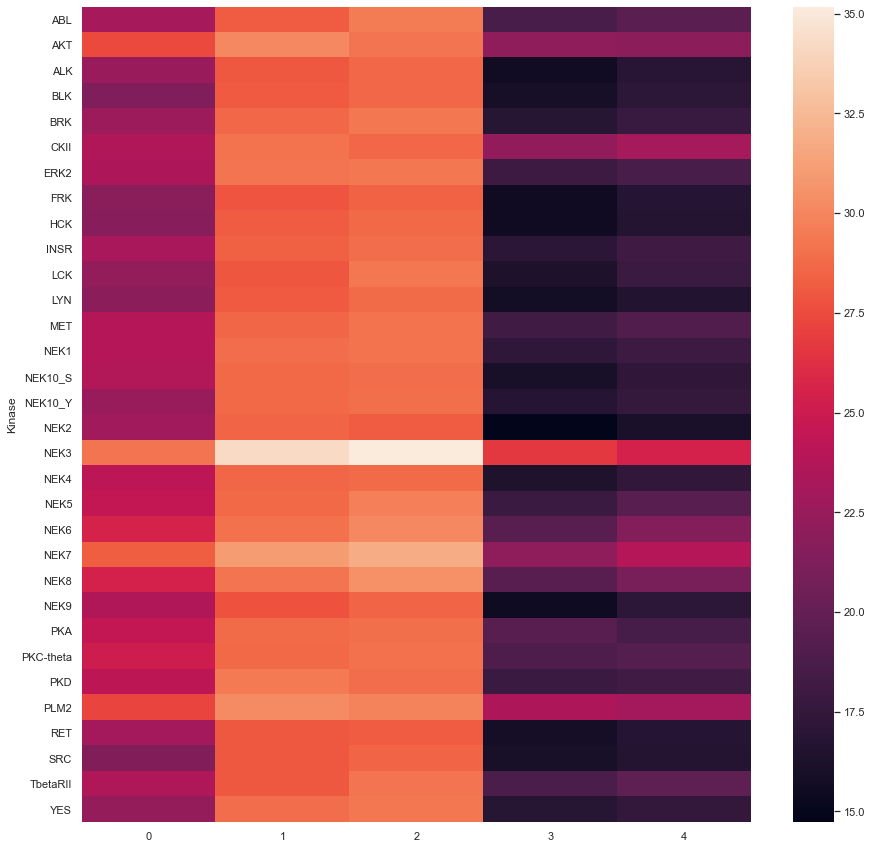

In [5]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1,1, figsize=(15, 15))
sns.heatmap(upK.sort_values(by="Kinase").set_index("Kinase"), ax=ax)

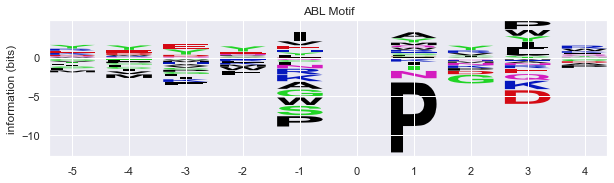

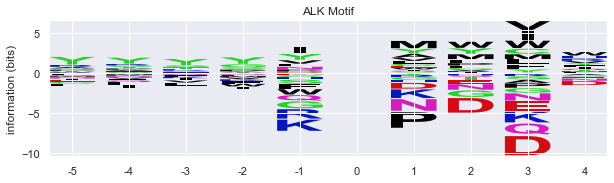

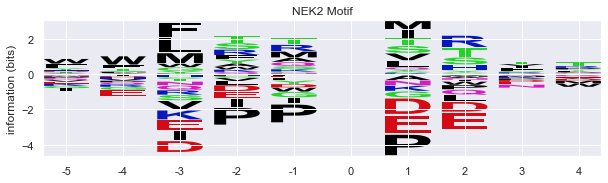

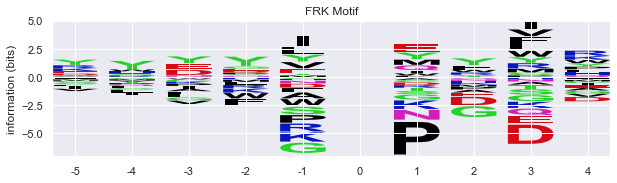

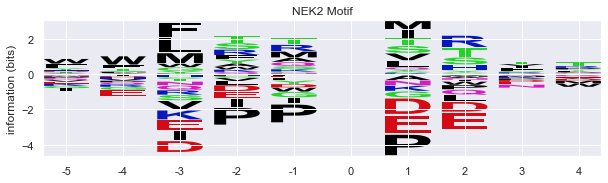

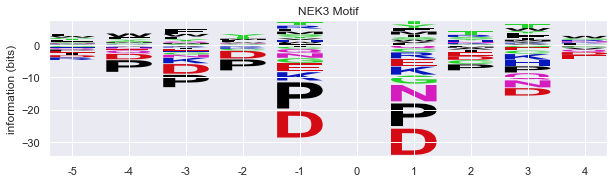

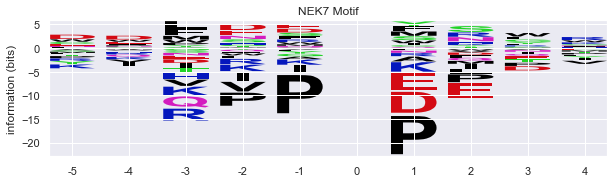

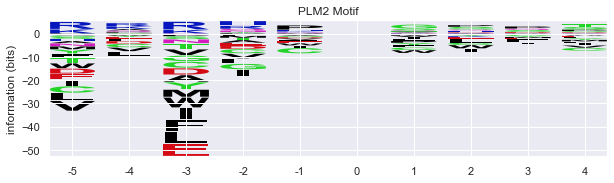

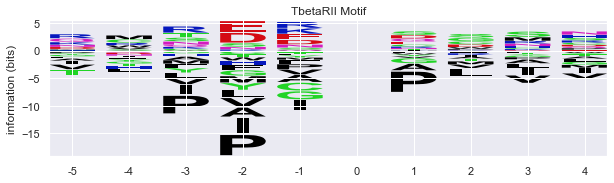

In [6]:
pspls = ["ABL", "ALK", "NEK2", "FRK", "NEK2", "NEK3", "NEK7", "PLM2", "TbetaRII"]

pssms = []
for kin in pspls:
    pssm = pd.read_csv("msresist/data/PSPL/" + kin + ".csv").set_index("Unnamed: 0").iloc[:-2, :]
    if np.all(pssm >= 0):
        pssm = np.log2(pssm)
    pssms.append(pssm)

plotMotifs(pssms, [-5, -4, -3, -2, -1, 1, 2, 3, 4], pspls)

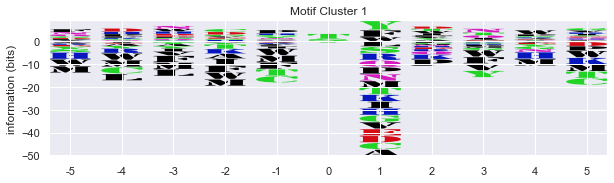

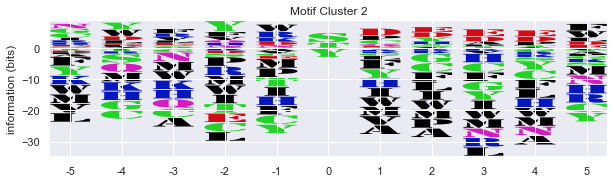

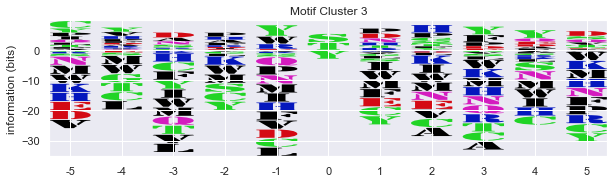

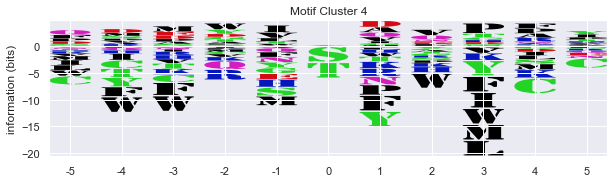

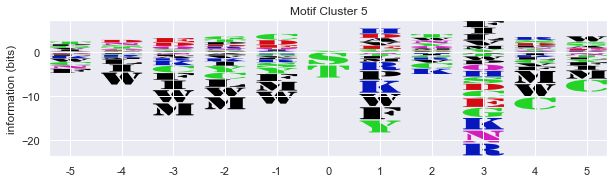

In [10]:
plotMotifs(model)

In [1]:
abl = pd.read_csv("msresist/data/PSPL/ABL.csv")

pssms = []
pssms.append(abl.set_index("Unnamed: 0"))
pssms.append()
plotMotifs([pssm])

NameError: name 'pd' is not defined